# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### The data derives from 17 different marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils.multiclass import type_of_target
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
bankData = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bankData.isnull().sum()
bankData.dropna()
bankData.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
bankData[bankData == 'yes'].count()
bankData[bankData == 'no'].count()

bankData['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
bankData['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
bankData = bankData.replace('yes','1')
bankData = bankData.replace('no','0')

In [9]:
bankData['housing'].value_counts()

1          21576
0          18622
unknown      990
Name: housing, dtype: int64

In [10]:
bankData[bankData == 'unknown'].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [11]:
#Dropping unknown values from default, housing, and loan so I can convert to int
bankData.drop(bankData[bankData.default == 'unknown'].index, inplace=True)
bankData.drop(bankData[bankData.housing == 'unknown'].index, inplace=True)
bankData.drop(bankData[bankData.loan == 'unknown'].index, inplace=True)

<Axes: >

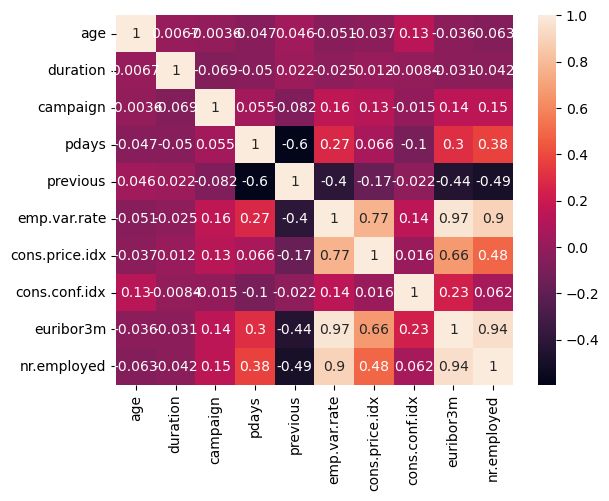

In [12]:
sns.heatmap(bankData.corr(numeric_only=True), annot=True)

In [13]:
bankData[['default', 'housing', 'loan', 'y']] = bankData[['default', 'housing', 'loan', 'y']].astype(int)

In [14]:
bankData['y'].value_counts()

0    27727
1     4101
Name: y, dtype: int64

In [15]:
bankData['job'].value_counts()

admin.           8930
blue-collar      5939
technician       5645
services         2972
management       2406
retired          1292
entrepreneur     1126
self-employed    1110
unemployed        758
student           749
housemaid         724
unknown           177
Name: job, dtype: int64

In [16]:
#Address unknown values and condense jobs
bankData['job'] = bankData['job'].replace(['admin.'], 'management')
bankData['job'] = bankData['job'].replace(['services', 'housemaid', 'technician'], 'blue-collar')
bankData['job'] = bankData['job'].replace(['retired', 'student', 'unknown'], 'unemployed')
bankData['job'] = bankData['job'].replace(['entrepreneur'], 'self-employed')

In [17]:
bankData['job'].value_counts()

blue-collar      15280
management       11336
unemployed        2976
self-employed     2236
Name: job, dtype: int64

In [18]:
bankData['job_logreg'] = bankData['job'].map({'blue-collar': 1, 'management': 2, 'unemployed': 3, 'self-employed': 4})

In [19]:
bankData['marital'].value_counts()

married     18233
single       9848
divorced     3679
unknown        68
Name: marital, dtype: int64

In [20]:
#Drop 68 marital unknowns
bankData.drop(bankData[bankData.marital == 'unknown'].index, inplace=True)

In [21]:
bankData['marital'].value_counts()

married     18233
single       9848
divorced     3679
Name: marital, dtype: int64

In [22]:
bankData['marital_logreg'] = bankData['marital'].map({'married': 1, 'single': 2, 'divorced': 3})

In [23]:
bankData['education'].value_counts()

university.degree      10450
high.school             7705
professional.course     4329
basic.9y                4298
basic.4y                2409
basic.6y                1402
unknown                 1156
illiterate                11
Name: education, dtype: int64

In [24]:
#Drop unknown and illiterate values, condense education
bankData['education'] = bankData['education'].replace(['university.degree', 'professional.course'], 'advanced')
bankData['education'] = bankData['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')
bankData['education'] = bankData['education'].replace([ 'high.school'], 'high school')
bankData.drop(bankData[bankData.education == 'unknown'].index, inplace=True)
bankData.drop(bankData[bankData.education == 'illiterate'].index, inplace=True)

In [25]:
bankData['education'].value_counts()

advanced       14779
basic           8109
high school     7705
Name: education, dtype: int64

In [26]:
bankData['education_logreg'] = bankData['education'].map({'advanced': 1, 'basic': 2, 'high school': 3})

In [27]:
#Dropping duration based on, "should be discarded if the intention is to have a realistic predictive model."
bankData.drop(["duration"],axis = 1,inplace = True)

In [28]:
bankData['day_of_week'].value_counts()

thu    6419
mon    6305
wed    6148
tue    5980
fri    5741
Name: day_of_week, dtype: int64

In [29]:
#The days appear irrelevant as they are too close in comparison
bankData.drop(['day_of_week'],axis = 1,inplace = True)

In [30]:
bankData['contact'].value_counts()

cellular     20504
telephone    10089
Name: contact, dtype: int64

In [31]:
#I do not feel that contact will be of any use
bankData.drop(['contact'],axis = 1,inplace = True)

In [32]:
bankData.head()

,age,job,marital,education,default,housing,loan,month,campaign,pdays,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_logreg,marital_logreg,education_logreg
0,56,blue-collar,married,basic,0,0,0,may,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,1,2
2,37,blue-collar,married,high school,0,1,0,may,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,1,3
3,40,management,married,basic,0,0,0,may,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,2
4,56,blue-collar,married,high school,0,0,1,may,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,1,3
6,59,management,married,advanced,0,0,0,may,1,999,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,1,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

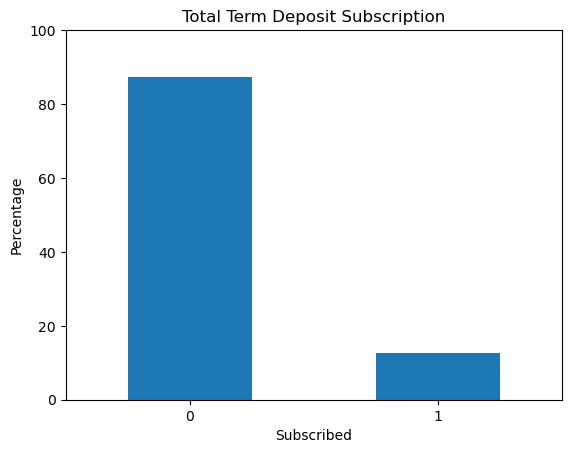

In [33]:
y_bar = (bankData["y"].value_counts(normalize=True)*100).plot(kind='bar', ylim=(0,100), 
         title='Total Term Deposit Subscription')
y_bar.set_xlabel("Subscribed")
y_bar.set_ylabel("Percentage")
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'management'),
  Text(2, 0, 'self-employed'),
  Text(3, 0, 'unemployed')])

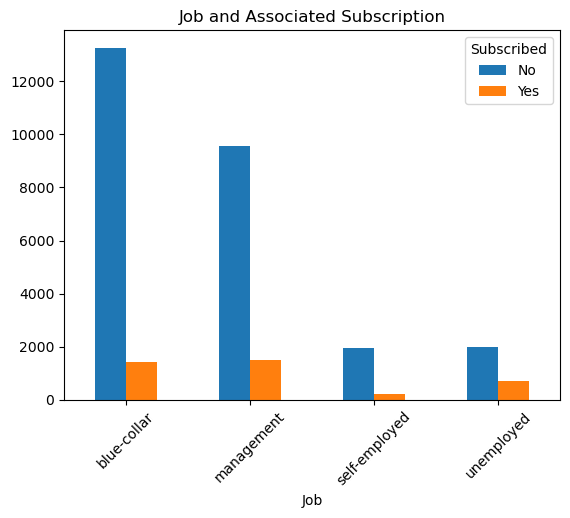

In [34]:
bank_bar = bankData.groupby(['job','y']).size().unstack().plot(kind='bar', title='Job and Associated Subscription')
bank_bar.set_xlabel("Job")
bank_bar.legend(["No", "Yes"], title='Subscribed')
plt.xticks(rotation=45)

In [85]:
jobEdu_hist = px.histogram(bankData, x= 'job', histnorm='probability density', color="education", nbins=5)
jobEdu_hist.update_layout(bargap=0.2)

In [36]:
px.density_heatmap(bankData[bankData['y']==True], x="job", y="education", marginal_x="histogram", marginal_y="histogram")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Using the data derived from 17 different marketing campaings for Portuguese banking institutions, we will predict if the bank's clients will subscribe to a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [37]:
array = bankData.values

In [38]:
array

array([[56, 'blue-collar', 'married', ..., 1, 1, 2],
       [37, 'blue-collar', 'married', ..., 1, 1, 3],
       [40, 'management', 'married', ..., 2, 1, 2],
       ...,
       [56, 'unemployed', 'married', ..., 3, 1, 1],
       [44, 'blue-collar', 'married', ..., 1, 1, 1],
       [74, 'unemployed', 'married', ..., 3, 1, 1]], dtype=object)

In [39]:
# Features: first 7 columns
X = bankData[['age', 'job_logreg', 'marital_logreg', 'education_logreg', 'default', 'housing', 'loan']]

# Target Column
y = bankData['y'].astype(int)

In [40]:
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30593, dtype: int32

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (21415, 7)
X Test: (9178, 7)
y Train: (21415,)
y Test: (9178,)


In [43]:
print(type_of_target(y_train))

binary


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [44]:
dummy_model = DummyClassifier(strategy='uniform')
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [45]:
dummy_model.predict(X_test)

array([0, 1, 1, ..., 1, 0, 1])

In [46]:
dummy_model.score(X_test, y_test)

0.4984746132054914

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [47]:
log_reg_model = LogisticRegression(random_state=0)
log_reg_model_start=time.time()
log_reg_model.fit(X_train, y_train)
log_reg_model_end=time.time()

log_reg_model_pred = log_reg_model.predict(X_test)

In [48]:
# Test Accuracy Score
log_reg_model_test_acc = log_reg_model.score(X_test, y_test)
log_reg_model_test_acc

0.8705600348659839

In [49]:
#Train Accuracy Score
log_reg_model_train_acc = log_reg_model.score(X_train, y_train)
log_reg_model_train_acc

0.8746205930422601

In [50]:
#Train time
log_reg_model_time = log_reg_model_end - log_reg_model_start
log_reg_model_time

0.046617984771728516

### Problem 9: Score the Model

What is the accuracy of your model?

In [51]:
acc_data = [[log_reg_model_train_acc, log_reg_model_test_acc]]
acc_df = pd.DataFrame(acc_data, columns=['Train Accuracy', 'Test Accuracy'], index=['Logistic Regression'])
acc_df

,Train Accuracy,Test Accuracy
Logistic Regression,0.874621,0.87056


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [52]:
#K Nearest Neighbor
knn_model = KNeighborsClassifier(n_jobs=-1)

knn_model_start=time.time()
knn_model.fit(X_train, y_train)
knn_model_end=time.time()

In [53]:
# Test Accuracy Score
knn_model_test_acc = knn_model.score(X_test, y_test)
knn_model_test_acc

0.8614077140989322

In [54]:
#Train Accuracy Score
knn_model_train_acc = knn_model.score(X_train, y_train)
knn_model_train_acc

0.8741069343917814

In [55]:
#Train time
knn_model_time = knn_model_end - knn_model_start
knn_model_time

0.0240633487701416

In [56]:
#Decision Tree
dectree_model = DecisionTreeClassifier()

dectree_model_start=time.time()
dectree_model.fit(X_train, y_train)
dectree_model_end=time.time()

In [57]:
# Test Accuracy Score
dectree_model_test_acc = dectree_model.score(X_test, y_test)
dectree_model_test_acc

0.8630420570930486

In [58]:
#Train Accuracy Score
dectree_model_train_acc = dectree_model.score(X_train, y_train)
dectree_model_train_acc

0.8877422367499417

In [59]:
#Train time
dectree_model_time = dectree_model_end - dectree_model_start
dectree_model_time

0.02005314826965332

In [60]:
#Support Vector Machines
svm_model = svm.SVC()

svm_model_start=time.time()
svm_model.fit(X_train, y_train)
svm_model_end=time.time()

In [61]:
# Test Accuracy Score
svm_model_test_acc = svm_model.score(X_test, y_test)
svm_model_test_acc

0.8705600348659839

In [62]:
#Train Accuracy Score
svm_model_train_acc = svm_model.score(X_train, y_train)
svm_model_train_acc

0.8746205930422601

In [63]:
#Train time
svm_model_time = svm_model_end - svm_model_start
svm_model_time

3.564408302307129

In [64]:
compare_data = [[log_reg_model_time, log_reg_model_train_acc, log_reg_model_test_acc], [knn_model_time, knn_model_train_acc, knn_model_test_acc], [dectree_model_time, dectree_model_train_acc, dectree_model_test_acc], [svm_model_time, svm_model_train_acc, svm_model_test_acc]]
compare_df = pd.DataFrame(compare_data, columns=['Train Time', 'Train Accuracy', 'Test Accuracy'], index=['Logistic Regression',
                               'K Nearest Neighbors',
                               'Decision Tree',
                               'Support Vector Machine'])
compare_df

,Train Time,Train Accuracy,Test Accuracy
Logistic Regression,0.046618,0.874621,0.870560
K Nearest Neighbors,0.024063,0.874107,0.861408
Decision Tree,0.020053,0.887742,0.863042
Support Vector Machine,3.564408,0.874621,0.870560


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Because we only selected the first 7 columns, I find no room for additional feature engineering.

In [67]:
#Hyperparameter tuning for KNN
grid = {'n_neighbors':np.arange(1, 25)}
knn_model_hyper = KNeighborsClassifier(n_jobs=-1)
knn_model_hyper = GridSearchCV(knn_model_hyper, grid, cv=10)

knn_model_hyper_start=time.time()
knn_model_hyper.fit(X_train, y_train)
knn_model_hyper_end=time.time()

In [68]:
# Test Accuracy Score
knn_model_hyper_test_acc = knn_model_hyper.score(X_test, y_test)
knn_model_hyper_test_acc

0.8703421224667683

In [69]:
#Train Accuracy Score
knn_model_hyper_train_acc = knn_model_hyper.score(X_train, y_train)
knn_model_hyper_train_acc

0.8757413028251225

In [70]:
#Train time
knn_model_hyper_time = knn_model_hyper_end - knn_model_hyper_start
knn_model_hyper_time

47.696471214294434

In [71]:
#Hyperparameter tuning for decison tree
dectree_model_hyper = DecisionTreeClassifier()

parameters = {"min_samples_split": range(1, 25)}
dectree_model_hyper = GridSearchCV(dectree_model_hyper, param_grid=parameters, n_jobs=-1)

dectree_model_hyper_start=time.time()
dectree_model_hyper.fit(X_train, y_train)
dectree_model_hyper_end=time.time()

In [72]:
# Test Accuracy Score
dectree_model_hyper_test_acc = dectree_model_hyper.score(X_test, y_test)
dectree_model_hyper_test_acc

0.8675092612769667

In [73]:
#Train Accuracy Score
dectree_model_hyper_train_acc = dectree_model_hyper.score(X_train, y_train)
dectree_model_hyper_train_acc

0.8789166472098996

In [74]:
#Train time
dectree_model_hyper_time = dectree_model_hyper_end - dectree_model_hyper_start
dectree_model_hyper_time

0.9362490177154541

In [75]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [76]:
params1 = {"kernel":['linear'],
       "degree":[1,2,3],
       "gamma":[0.1,1,.001],
       "C":[0.1,1,10]}

svm_model_hyper = svm.SVC()
#model = SVR(cache_size=7000)
svm_model_hyper_start=time.time()
svm_model_hyper = RandomizedSearchCV(svm_model_hyper, params1, cv=3, n_jobs=-1, verbose=True)
svm_model_hyper_end=time.time()

In [77]:
svm_model_hyper_start=time.time()
svm_model_hyper.fit(X_train, y_train)
svm_model_hyper_end=time.time()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [78]:
# Test Accuracy Score
svm_model_hyper_test_acc = svm_model_hyper.score(X_test, y_test)
svm_model_hyper_test_acc

0.8705600348659839

In [79]:
#Train Accuracy Score
svm_model_hyper_train_acc = svm_model_hyper.score(X_train, y_train)
svm_model_hyper_train_acc

0.8746205930422601

In [80]:
#Train time
svm_model_hyper_time = svm_model_hyper_end - svm_model_hyper_start
svm_model_hyper_time

10.93384051322937

In [82]:
compare_hyper_data = [[knn_model_hyper_time, knn_model_hyper_train_acc, knn_model_hyper_test_acc], [dectree_model_hyper_time, dectree_model_hyper_train_acc, dectree_model_hyper_test_acc], [svm_model_hyper_time, svm_model_hyper_train_acc, svm_model_hyper_test_acc]]
compare_hyper_df = pd.DataFrame(compare_hyper_data, columns=['Train Time', 'Train Accuracy', 'Test Accuracy'], index=['K Nearest Neighbors',
                               'Decision Tree',
                               'Support Vector Machine'])
compare_hyper_df

,Train Time,Train Accuracy,Test Accuracy
K Nearest Neighbors,47.696471,0.875741,0.870342
Decision Tree,0.936249,0.878917,0.867509
Support Vector Machine,10.933841,0.874621,0.870560
